In [4]:
# # E-commerce Dashboard: Analiza sprzedaży
# 
# Ten notebook zawiera analizę sprzedaży na podstawie danych przygotowanych w poprzednim etapie.

# ## 1. Import bibliotek

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

# Ustawienia wizualizacji
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('viridis')
%matplotlib inline

In [10]:
# ## 2. Wczytanie przetworzonych danych

# Ścieżka do przetworzonych danych
processed_path = '../data/processed/'

# Wczytywanie przetworzonych plików
orders = pd.read_csv(f"{processed_path}orders_clean.csv")
order_products = pd.read_csv(f"{processed_path}order_products.csv")
monthly_orders = pd.read_csv(f"{processed_path}monthly_orders.csv")
product_categories = pd.read_csv(f"{processed_path}product_categories.csv")
state_sales = pd.read_csv(f"{processed_path}state_sales.csv")

# Konwersja dat
date_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

for col in date_columns:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')

Analiza trendu miesięcznego sprzedaży...


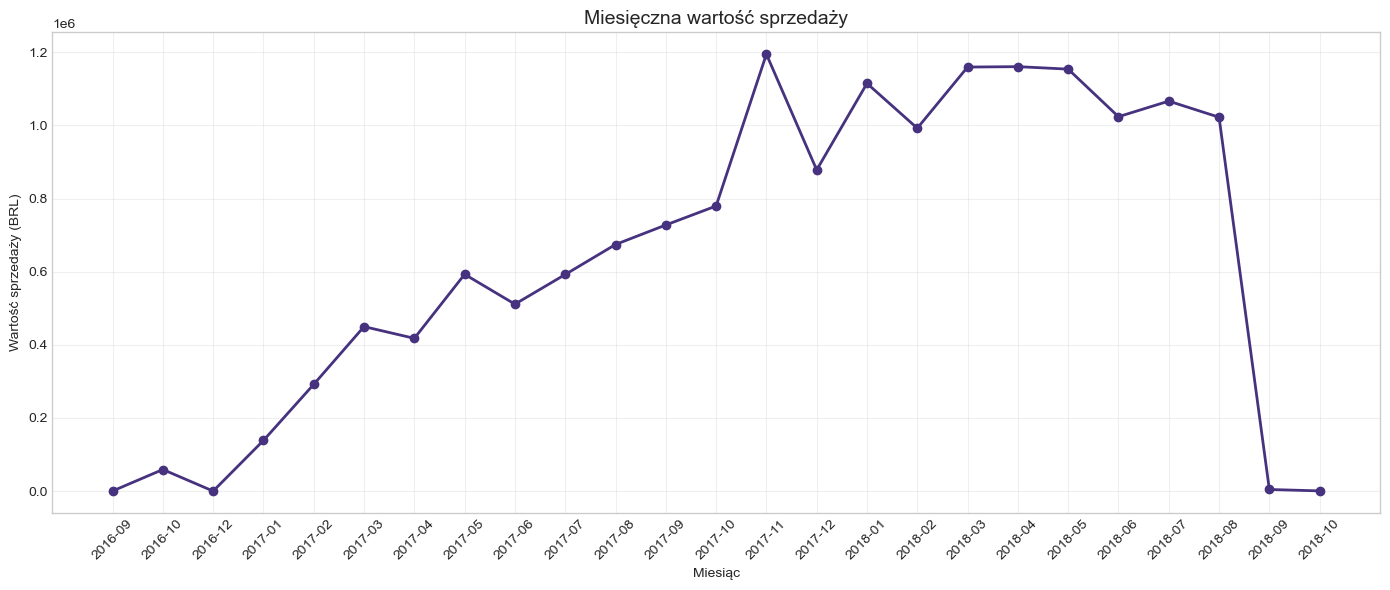

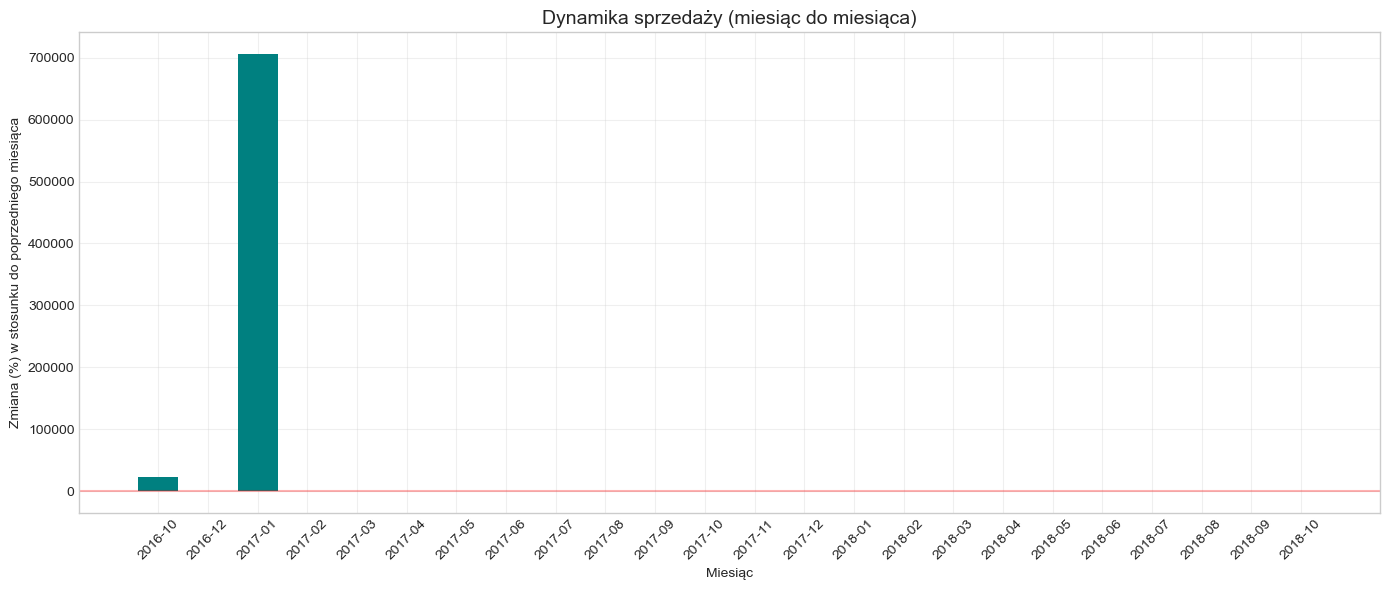

Analiza sprzedaży według dni tygodnia...


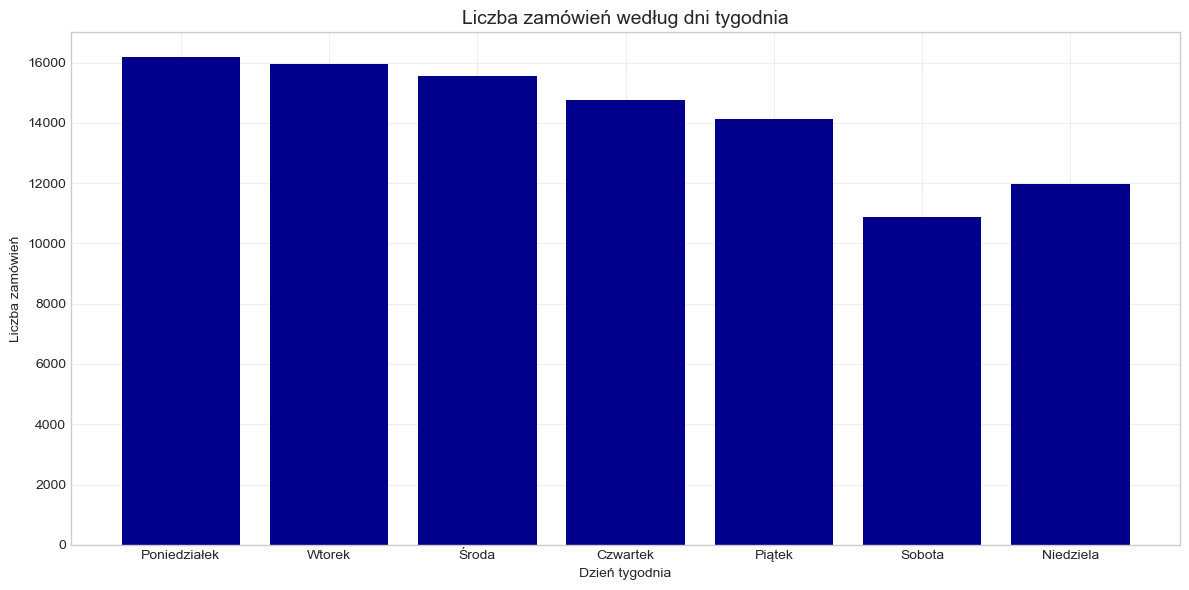

AttributeError: module 'matplotlib.pyplot' has no attribute 'savef'

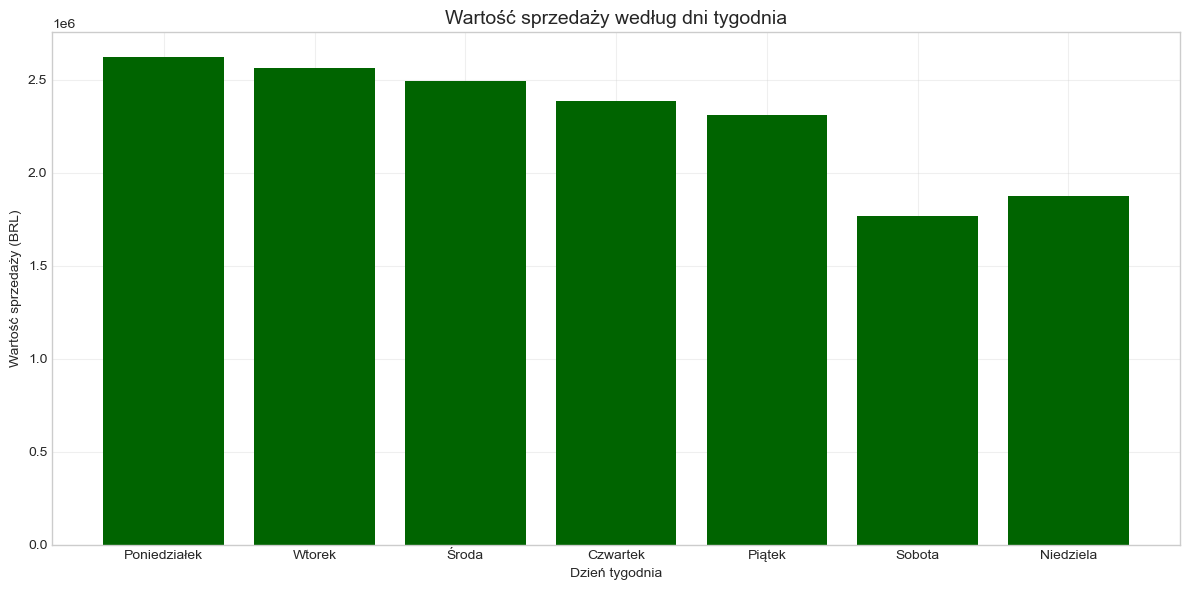

In [12]:
# ## 3. Analiza trendów sprzedaży w czasie

# ### 3.1 Trend miesięczny

print("Analiza trendu miesięcznego sprzedaży...")

plt.figure(figsize=(14, 6))
plt.plot(monthly_orders['yearmonth'], monthly_orders['total_sales'], marker='o', linestyle='-', linewidth=2)
plt.title('Miesięczna wartość sprzedaży', fontsize=14)
plt.xlabel('Miesiąc')
plt.ylabel('Wartość sprzedaży (BRL)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../dashboard/assets/monthly_sales.png', dpi=300)
plt.show()

# Obliczamy dynamikę sprzedaży (zmiana miesiąc do miesiąca)
monthly_orders['sales_growth'] = monthly_orders['total_sales'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.bar(monthly_orders['yearmonth'][1:], monthly_orders['sales_growth'][1:], color='teal')
plt.axhline(y=0, color='red', linestyle='-', alpha=0.3)
plt.title('Dynamika sprzedaży (miesiąc do miesiąca)', fontsize=14)
plt.xlabel('Miesiąc')
plt.ylabel('Zmiana (%) w stosunku do poprzedniego miesiąca')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../dashboard/assets/sales_growth.png', dpi=300)
plt.show()

# ### 3.2 Analiza sprzedaży według dni tygodnia

print("Analiza sprzedaży według dni tygodnia...")

# Agregacja danych według dni tygodnia
weekday_orders = orders.groupby('purchase_dayofweek').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

weekday_orders.columns = ['dayofweek', 'order_count', 'total_sales']

# Dodajemy nazwy dni tygodnia
days = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
weekday_orders['day_name'] = weekday_orders['dayofweek'].apply(lambda x: days[x])

# Sortujemy według dni tygodnia
weekday_orders = weekday_orders.sort_values('dayofweek')

# Wizualizacja liczby zamówień według dni tygodnia
plt.figure(figsize=(12, 6))
plt.bar(weekday_orders['day_name'], weekday_orders['order_count'], color='darkblue')
plt.title('Liczba zamówień według dni tygodnia', fontsize=14)
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba zamówień')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../dashboard/assets/weekday_orders.png', dpi=300)
plt.show()

# Wizualizacja wartości sprzedaży według dni tygodnia
plt.figure(figsize=(12, 6))
plt.bar(weekday_orders['day_name'], weekday_orders['total_sales'], color='darkgreen')
plt.title('Wartość sprzedaży według dni tygodnia', fontsize=14)
plt.xlabel('Dzień tygodnia')
plt.ylabel('Wartość sprzedaży (BRL)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savef